Size: 0, Time: 0.0000 ms
Size: 15000, Time: 97.8961 ms
Size: 30000, Time: 61.3427 ms
Size: 45000, Time: 99.1235 ms
Size: 60000, Time: 117.9688 ms
Size: 75000, Time: 201.5615 ms
Size: 90000, Time: 196.8970 ms
Size: 105000, Time: 275.4414 ms
Size: 120000, Time: 293.0751 ms
Size: 135000, Time: 338.1627 ms
Size: 150000, Time: 383.6794 ms
Size: 165000, Time: 424.9868 ms
Size: 180000, Time: 463.3594 ms
Size: 195000, Time: 506.8364 ms


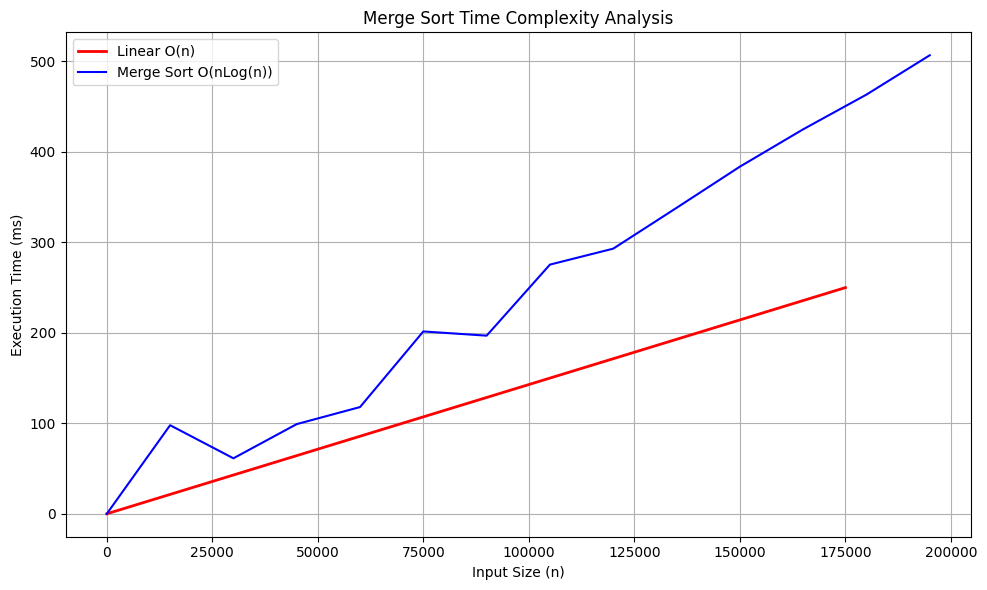

In [70]:
import matplotlib.pyplot as plt
import random
import time
from array import array

def merge(arr, si, mid, ei):
    temp = [0] * (ei - si + 1)
    i = si
    j = mid + 1
    k = 0

    while i <= mid and j <= ei:
        if arr[i] < arr[j]:
            temp[k] = arr[i]
            i += 1
        else:
            temp[k] = arr[j]
            j += 1
        k += 1

    while i <= mid:
        temp[k] = arr[i]
        i += 1
        k += 1

    while j <= ei:
        temp[k] = arr[j]
        j += 1
        k += 1

    # Copy back to original array
    for idx in range(len(temp)):
        arr[si+idx] = temp[idx]

def mergeSort(arr, si, ei):
    if si >= ei:
        return
    mid = (si + ei) // 2
    mergeSort(arr, si, mid)
    mergeSort(arr, mid + 1, ei)
    merge(arr, si, mid, ei)

# Input sizes to test
input_sizes = list(range(0,200001,15000))  # Up to 10000  


execution_times = []


# Measure execution time for each input size
for size in input_sizes:
    arr=[]
    # Generate a random array of given size
    for _ in range(size):
        num=random.randint(0,size)
        arr.append(num)
        
    # Record the time taken to sort
    start_time = time.time()
    mergeSort(arr,0,len(arr)-1)
    end_time = time.time()

    # Store time in milliseconds
    elapsed_time = (end_time - start_time) * 1000
    execution_times.append(elapsed_time)
    print(f"Size: {size}, Time: {elapsed_time:.4f} ms")

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot([0, 175000], [0, 250], color='red', linestyle='-', linewidth=2, label='Linear O(n)')
plt.plot(input_sizes, execution_times, marker='', linestyle='-', color='blue', label='Merge Sort O(nLog(n))')
plt.title("Merge Sort Time Complexity Analysis")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
    

